# TEXT MINING & SENTIMENT ANALYSIS

In [1]:
#Loading important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns


from wordcloud import WordCloud
import nltk
nltk.download(['stopwords',
               'punkt',
               'wordnet',
               'omw-1.4',
               'vader_lexicon'
])
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/macbook/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/macbook/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/macbook/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/macbook/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/macbook/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
#Loading the dataset
reviews = pd.read_csv('tourist_accommodation_reviews.csv', encoding= 'unicode_escape')

reviews.head()

,ID,Review Date,Location,Hotel/Restaurant name,Review
0,rn579778340,Reviewed 1 week ago,Kathu,Thong Dee The Kathu Brasserie,Just been for sunday roast lamb and beef truly...
1,rn576350875,Reviewed 3 weeks ago,Kathu,Thong Dee The Kathu Brasserie,"Quietly set off the main road, nice atmosphere..."
2,rn574921678,Reviewed 4 weeks ago,Kathu,Thong Dee The Kathu Brasserie,I made a reservation for a birthday two days i...
3,rn572905503,"Reviewed April 12, 2018",Kathu,Thong Dee The Kathu Brasserie,We visit here regularly and never fail to be i...
4,rn572364712,"Reviewed April 10, 2018",Kathu,Thong Dee The Kathu Brasserie,Visited this wonderful place on my travels and...


In [3]:
reviews.describe()

,ID,Review Date,Location,Hotel/Restaurant name,Review
count,53644,53644,53644,53644,53644
unique,49944,2344,25,537,49938
top,rn371149456,Reviewed 1 week ago,Patong,Da Mario,"I like this restaurant. Good foods,delicious f..."
freq,10,616,16403,279,10


In [4]:
reviews['Location'].unique()

array([' Kathu', ' Kata Beach', ' Rawai', ' Choeng Thale', ' Karon Beach',
       ' Phuket Town', ' Patong', ' Mai Khao', ' Karon', ' Chalong',
       ' Nai Harn', ' Cape Panwa', ' Sakhu', ' Pa Khlok', ' Kamala',
       ' Bang Tao Beach', ' Thalang District', ' Talat Nuea',
       ' Kata Noi Beach', ' Wichit', ' Nai Yang', ' Talat Yai',
       ' Koh Kaew', ' Nai Thon', ' Ratsada'], dtype=object)

In [5]:
#Picking a location for analysis
dataset = reviews[reviews.Location == ' Kamala']

In [6]:
dataset.describe()

,ID,Review Date,Location,Hotel/Restaurant name,Review
count,3162,3162,3162,3162,3162
unique,2932,1070,1,32,2930
top,rn576827877,Reviewed 1 week ago,Kamala,Cafe del Mar Phuket,The restaurant has wide terrace space to dinni...
freq,6,51,3162,100,6


In [7]:
dataset['Hotel/Restaurant name'].unique()

array(['Grill Bill', 'The Greek Tavern',
       'Vanilla Sky Bar & Gastro Pub - Cape Sienna - Phuket, Thailand',
       'SILK Restaurant & Bar',
       'Bianconero da Tuveri Restaurant & Pizzeria', 'Blue Manao',
       'Hey Ha Bar & Restaurant', 'Tantra', 'The Place', 'Baan Mai',
       'Bush Garden Kamala<U+200B>', 'Baan Rim Pa Kalim',
       'Napoli Ristorante Pizzeria', 'White Orchid', 'Oiy Restaurant',
       'HQ Beach Lounge', 'Smile Bar', 'THE DECK',
       'Sweet Dream Restaurant', 'Pond Restaurant', 'Ohlala',
       'Mamma Mia Grill & Restaurant Kamala', 'Kaab Gluay', 'Bellini',
       "Danny's Place Kamala", 'Cafe del Mar Phuket',
       'H.C. Andersen - Family Restaurant',
       'Top Of The Reef at Cape Panwa Hotel', 'Heaven',
       'Wine Connection Deli & Bistro - Central Phuket',
       'Salt & Pepper Restaurant Steakhouse Pizzeria', 'Karon Seafood'],
      dtype=object)

In [8]:
dataset['Hotel/Restaurant name'].value_counts()

Cafe del Mar Phuket                                              100
The Place                                                        100
Kaab Gluay                                                       100
Karon Seafood                                                    100
Baan Mai                                                         100
SILK Restaurant & Bar                                            100
H.C. Andersen - Family Restaurant                                100
White Orchid                                                     100
THE DECK                                                         100
The Greek Tavern                                                 100
Grill Bill                                                       100
Sweet Dream Restaurant                                           100
HQ Beach Lounge                                                  100
Baan Rim Pa Kalim                                                100
Napoli Ristorante Pizzeria        

In [9]:
#Removing the last two restaurant/hotel
dataset.drop(dataset[dataset['Hotel/Restaurant name'] == 'Salt & Pepper Restaurant Steakhouse Pizzeria'].index, inplace = True)
dataset.drop(dataset[dataset['Hotel/Restaurant name'] == 'Pond Restaurant'].index, inplace = True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [10]:
dataset.describe()

,ID,Review Date,Location,Hotel/Restaurant name,Review
count,2975,2975,2975,2975,2975
unique,2795,1021,1,30,2793
top,rn559720518,Reviewed 1 week ago,Kamala,Cafe del Mar Phuket,"With a great view of several beaches, a great ..."
freq,6,48,2975,100,6


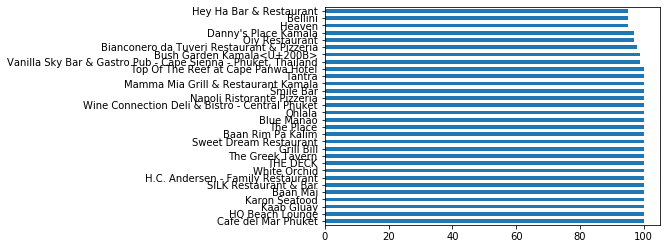

In [11]:
#To see how many reviews each hotel has

dataset['Hotel/Restaurant name'].value_counts()[:30].plot(kind='barh')

In [12]:
#Making a copy of the data for VADER modeling
preprocessdata = dataset.copy()

In [13]:
# Create a function to apply to all of our data preprocessing steps which we can then use on a corpus

stop_words = nltk.corpus.stopwords.words('english')

def preprocess_text(text):
  tokenized_document = nltk.tokenize.RegexpTokenizer('[a-zA-Z0-9\']+').tokenize(text) #tokenize
  cleaned_tokens = [word.lower() for word in tokenized_document if word.lower() not in stop_words] #Remove
  stemmed_text = [nltk.stem.PorterStemmer().stem(word) for word in cleaned_tokens] #Stemming

  return stemmed_text

In [14]:
#Applying the defined pre-processing steps
preprocessdata['Review'] = preprocessdata['Review'].apply(preprocess_text)

In [15]:
preprocessdata.head()

,ID,Review Date,Location,Hotel/Restaurant name,Review
6138,rn580448653,Reviewed 5 days ago,Kamala,Grill Bill,"[best, place, eat, want, time, thai, food, tun..."
6139,rn580335133,Reviewed 5 days ago,Kamala,Grill Bill,"[grill, bill, amaz, cozi, place, warm, atmosph..."
6140,rn579799722,Reviewed 1 week ago,Kamala,Grill Bill,"[see, grill, bill, number, one, restur, kamala..."
6141,rn578695769,Reviewed 1 week ago,Kamala,Grill Bill,"[3, person, order, angu, beef, steak, 800, bah..."
6142,rn577118778,Reviewed 2 weeks ago,Kamala,Grill Bill,"[fast, friendli, servic, tasti, bbq, western, ..."


# VADER MODEL

In [16]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sentiment = SentimentIntensityAnalyzer()

In [17]:
#Generating polarity scores for the column review and creating a column for each score

dataset['compound'] = [sentiment.polarity_scores(review)['compound'] for review in dataset['Review']]
dataset['neg'] = [sentiment.polarity_scores(review)['neg'] for review in dataset['Review']]
dataset['neu'] = [sentiment.polarity_scores(review)['neu'] for review in dataset['Review']]
dataset['pos'] = [sentiment.polarity_scores(review)['pos'] for review in dataset['Review']]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

In [18]:
dataset.head()

,ID,Review Date,Location,Hotel/Restaurant name,Review,compound,neg,neu,pos
6138,rn580448653,Reviewed 5 days ago,Kamala,Grill Bill,The best place to eat when you want time out f...,0.9600,0.000,0.686,0.314
6139,rn580335133,Reviewed 5 days ago,Kamala,Grill Bill,Grill Bill is a amazing cozy place with a warm...,0.9704,0.000,0.565,0.435
6140,rn579799722,Reviewed 1 week ago,Kamala,Grill Bill,After seeing that Grill Bill was the number on...,0.9042,0.000,0.742,0.258
6141,rn578695769,Reviewed 1 week ago,Kamala,Grill Bill,3 persons ordered Angus Beef steak 800 baht ea...,0.1833,0.147,0.662,0.191
6142,rn577118778,Reviewed 2 weeks ago,Kamala,Grill Bill,"Very fast and friendly service, tasty BBQ, but...",0.3031,0.000,0.870,0.130


In [20]:
#Getting a general overview of the scores
dataset[['compound','neg','neu','pos']].describe()

,compound,neg,neu,pos
count,2975.000000,2975.000000,2975.000000,2975.000000
mean,0.668452,0.027218,0.734395,0.238391
std,0.420118,0.050901,0.124043,0.133638
min,-0.932800,0.000000,0.244000,0.000000
25%,0.612450,0.000000,0.657000,0.141000
50%,0.844200,0.000000,0.738000,0.231000
75%,0.929900,0.043000,0.822000,0.326000
max,0.990400,0.427000,1.000000,0.756000


In [22]:
#calculate positive reviews as percentage of total reviews for each restaurant/hotel

percent_positive = pd.DataFrame((dataset['compound']>0).groupby(dataset['Hotel/Restaurant name']).sum()
/dataset['Hotel/Restaurant name'].groupby(dataset['Hotel/Restaurant name']).count()*100, columns = ['% positive reviews']).sort_values(by='% positive reviews')

percent_positive

,% positive reviews
Hotel/Restaurant name,
Karon Seafood,73.000000
Cafe del Mar Phuket,81.000000
Napoli Ristorante Pizzeria,82.000000
Wine Connection Deli & Bistro - Central Phuket,82.000000
Ohlala,84.000000
H.C. Andersen - Family Restaurant,84.000000
Kaab Gluay,85.000000
White Orchid,87.000000
Danny's Place Kamala,87.628866


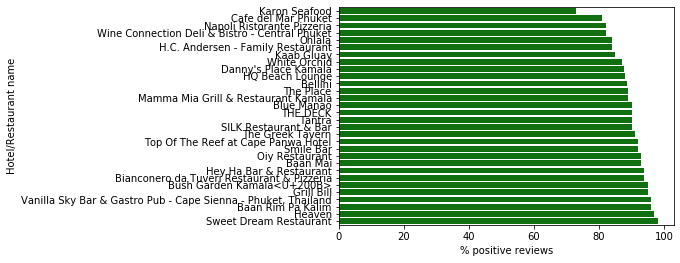

In [23]:
sns.barplot(data=percent_positive, x = '% positive reviews', y=percent_positive.index, color='green')

In [25]:
#preprocess the text data ready for wordcloud visualisation, using the function we defined earlier
#for this part of the exercise we will focus on 'Sweet Dream Restaurant'

dataset['processed_review'] = dataset['Review'].apply(preprocess_text)

dataset_positive_subset = dataset.loc[(dataset['Hotel/Restaurant name']=='Sweet Dream Restaurant')
                    & (dataset['compound']>0),:]

dataset_negative_subset = dataset.loc[(dataset['Hotel/Restaurant name']=='Sweet Dream Restaurant')
                    & (dataset['compound']<=0),:]

dataset_positive_subset.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,ID,Review Date,Location,Hotel/Restaurant name,Review,compound,neg,neu,pos,processed_review
29549,rn577557438,Reviewed 2 weeks ago,Kamala,Sweet Dream Restaurant,The food here is the best Thai food we found i...,0.8834,0.000,0.708,0.292,"[food, best, thai, food, found, kamala, beach,..."
29550,rn570942993,"Reviewed April 4, 2018",Kamala,Sweet Dream Restaurant,"As others already pointed out: average, pretty...",0.7684,0.082,0.676,0.242,"[other, alreadi, point, averag, pretti, averag..."
29551,rn569834669,"Reviewed March 31, 2018",Kamala,Sweet Dream Restaurant,"The ambience of the restaurant is nice, the se...",0.8374,0.000,0.765,0.235,"[ambienc, restaur, nice, servic, rather, slow,..."
29552,rn568569944,"Reviewed March 24, 2018",Kamala,Sweet Dream Restaurant,Disappointed by this place we tried to change ...,0.8100,0.040,0.777,0.183,"[disappoint, place, tri, chang, favorit, place..."
29553,rn568553833,"Reviewed March 24, 2018",Kamala,Sweet Dream Restaurant,"We chose this place on a whim, and were pleasa...",0.6124,0.000,0.889,0.111,"[chose, place, whim, pleasantli, surpris, expe..."


<function matplotlib.pyplot.show(*args, **kw)>

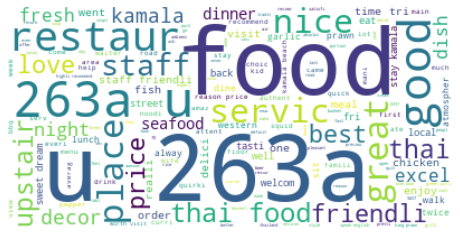

In [27]:
#wordcloud of words from positive reviews for Sweet Dream restaurant

pos_tokens = [word for review in dataset_positive_subset['processed_review'] for word in review]

wordcloud = WordCloud(background_color='white').generate_from_text( ' '.join(pos_tokens))

#Display the generated image:
plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

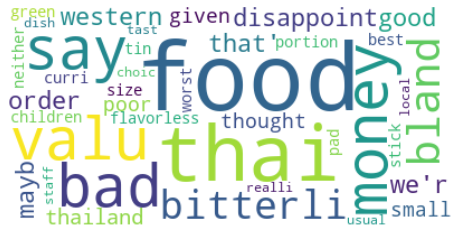

In [28]:
#wordcloud of words from positive reviews for Sweet Dream restaurant

neg_tokens = [word for review in dataset_negative_subset['processed_review'] for word in review]

wordcloud = WordCloud(background_color='white').generate_from_text( ' '.join(neg_tokens))

#Display the generated image:
plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show

      u    food    263a    good restaur    thai   staff   great   place  kamala 
    103      85      64      51      48      41      35      33      32      30 


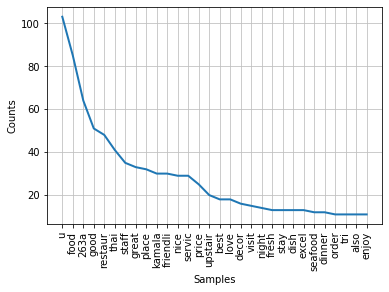

In [33]:
#use the nltk FreqDist to view word count, tabulate then visualize

from nltk.probability import FreqDist

pos_freqdist = FreqDist(pos_tokens)

pos_freqdist.tabulate(10)

pos_freqdist.plot(30)

      food       thai       valu      money        say        bad      bland   bitterli disappoint      order 
         6          4          2          2          2          2          1          1          1          1 


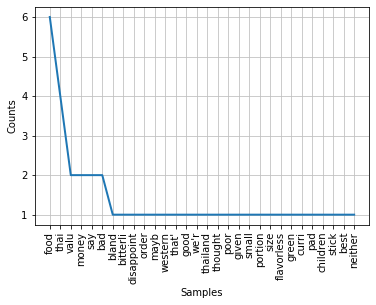

In [34]:
#use the nltk FreqDist to view word count, tabulate then visualize

neg_freqdist = FreqDist(neg_tokens)

neg_freqdist.tabulate(10)

neg_freqdist.plot(30)